In [1]:
from datasets import load_dataset, Dataset, concatenate_datasets

dataset = load_dataset("orieg/elsevier-oa-cc-by", split="train+test+validation")
dataset

Generating train split:   0%|          | 0/32072 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/4008 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/4009 [00:00<?, ? examples/s]

Dataset elsevier_oa_cc_by downloaded and prepared to /root/.cache/huggingface/datasets/orieg___elsevier_oa_cc_by/all/1.0.1/90990052f835613074d87af3592fd8eaee912f17ca4d0401bcf6d2d791d45117. Subsequent calls will reuse this data.


Dataset({
    features: ['title', 'abstract', 'subjareas', 'keywords', 'asjc', 'body_text', 'author_highlights'],
    num_rows: 40089
})

In [4]:
def update_dict(d, k, value):
    if k not in d:
        d[k] = {"value": value, "n": 1}
    else:
        d[k]["value"] = d[k]["value"] + value
        d[k]["n"] = 1 + d[k]["n"]

counter = {}
for article in dataset:
    for label in article["subjareas"]:
        len_sentences = []
        for sentence in article["body_text"]:
            len_sentences.append(len(sentence.split(" ")))
        n_words_article = sum(len_sentences)
        update_dict(counter, label, n_words_article)

counter

{'BIOC': {'value': 33248410, 'n': 7509},
 'ENVI': {'value': 31664814, 'n': 5473},
 'SOCI': {'value': 22014557, 'n': 3194},
 'MATE': {'value': 13827402, 'n': 3114},
 'MEDI': {'value': 26109765, 'n': 6486},
 'NEUR': {'value': 18384472, 'n': 3281},
 'MULT': {'value': 6024549, 'n': 3477},
 'IMMU': {'value': 12027863, 'n': 2895},
 'VETE': {'value': 3372780, 'n': 888},
 'BUSI': {'value': 6303388, 'n': 845},
 'ENER': {'value': 14263413, 'n': 2463},
 'ENGI': {'value': 22224831, 'n': 4297},
 'EART': {'value': 14232478, 'n': 2154},
 'PHAR': {'value': 10839773, 'n': 2169},
 'AGRI': {'value': 22275696, 'n': 4364},
 'PHYS': {'value': 8997975, 'n': 2155},
 'CHEM': {'value': 10468068, 'n': 2266},
 'CENG': {'value': 8167462, 'n': 1708},
 'ECON': {'value': 6037600, 'n': 869},
 'COMP': {'value': 10516150, 'n': 1812},
 'MATH': {'value': 2374736, 'n': 479},
 'NURS': {'value': 1274620, 'n': 274},
 'HEAL': {'value': 2259490, 'n': 748},
 'ARTS': {'value': 6182310, 'n': 875},
 'PSYC': {'value': 10185441, 'n':

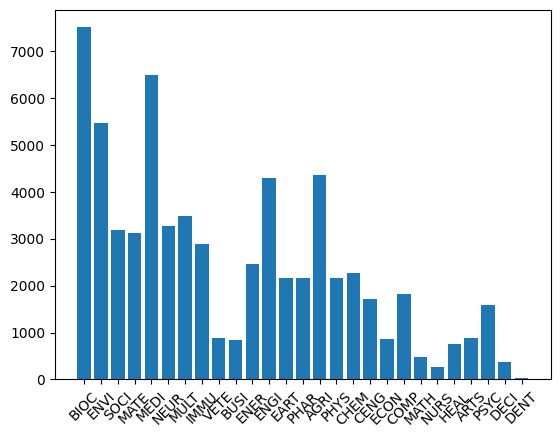

In [6]:
import matplotlib.pyplot as plt
values=[elem["n"] for elem in counter.values()]
plt.bar(range(len(counter)), values, align='center')
plt.xticks(range(len(counter)), list(counter.keys()), rotation=45, ha='center')
plt.show()

In [ ]:
# Lets normalize dividing all the words per area and the number of articles of that area
word_counter = {}
for key in counter:
    word_counter[key] = round(counter[key]["value"] /counter[key]["n"], 2)
word_counter

{'BIOC': 4427.81,
 'ENVI': 5785.64,
 'SOCI': 6892.47,
 'MATE': 4440.4,
 'MEDI': 4025.56,
 'NEUR': 5603.31,
 'MULT': 1732.69,
 'IMMU': 4154.7,
 'VETE': 3798.18,
 'BUSI': 7459.63,
 'ENER': 5791.07,
 'ENGI': 5172.17,
 'EART': 6607.46,
 'PHAR': 4997.59,
 'AGRI': 5104.42,
 'PHYS': 4175.39,
 'CHEM': 4619.62,
 'CENG': 4781.89,
 'ECON': 6947.76,
 'COMP': 5803.61,
 'MATH': 4957.7,
 'NURS': 4651.9,
 'HEAL': 3020.71,
 'ARTS': 7065.5,
 'PSYC': 6426.15,
 'DECI': 7136.53,
 'DENT': 3564.36}

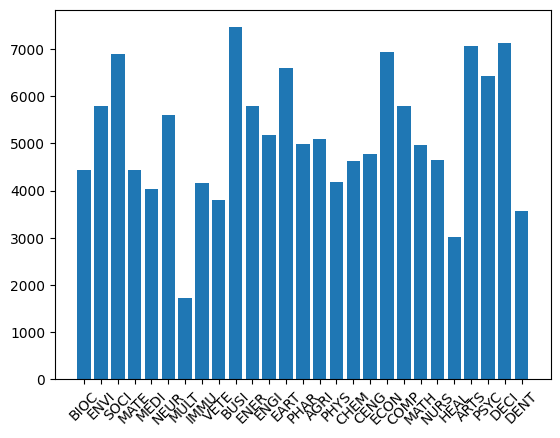

In [ ]:
plt.bar(range(len(word_counter)), list(word_counter.values()), align='center')
plt.xticks(range(len(word_counter)), list(word_counter.keys()), rotation=45, ha='center')
plt.show()

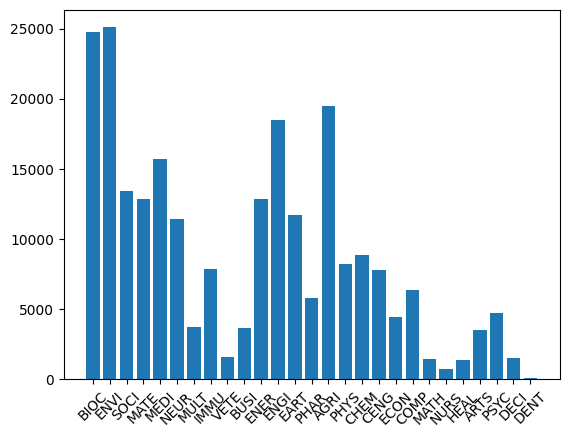

{'BIOC': 24787,
 'ENVI': 25085,
 'SOCI': 13439,
 'MATE': 12841,
 'MEDI': 15741,
 'NEUR': 11429,
 'MULT': 3745,
 'IMMU': 7895,
 'VETE': 1618,
 'BUSI': 3693,
 'ENER': 12850,
 'ENGI': 18499,
 'EART': 11723,
 'PHAR': 5791,
 'AGRI': 19500,
 'PHYS': 8221,
 'CHEM': 8852,
 'CENG': 7825,
 'ECON': 4468,
 'COMP': 6393,
 'MATH': 1464,
 'NURS': 731,
 'HEAL': 1358,
 'ARTS': 3509,
 'PSYC': 4706,
 'DECI': 1522,
 'DENT': 99}

In [ ]:
# Search for the target words in tokenized sentences
def search_for_words(target_words, normalized=False):
    def search_for_words_sentences(sentences, target_words):
        matching_sentences = 0

        for i, sentence in enumerate(sentences):

            # Check if any of the target words is present in the sentence
            if any(word in sentence.lower() for word in target_words):
                matching_sentences = matching_sentences + 1


        return matching_sentences

    matching = {}
    for article in dataset:
        for label in article["subjareas"]:
            if label in matching:
                matching[label] = matching[label] + search_for_words_sentences(article["body_text"], target_words)
            else:
                matching[label] = search_for_words_sentences(article["body_text"], target_words)
    if not normalized:
        plt.bar(range(len(matching)), list(matching.values()), align='center')
        plt.xticks(range(len(matching)), list(matching.keys()), rotation=45, ha='center')
        plt.show()
        return matching
    else:
        # Lets normalize dividing all the words per area and the number of articles of that area
        normalized_counter = {}
        for key in matching:
            normalized_counter[key] = round( matching[key] / counter[key]["n"], 2)

        plt.bar(range(len(normalized_counter)), list(normalized_counter.values()), align='center')
        plt.xticks(range(len(normalized_counter)), list(normalized_counter.keys()), rotation=45, ha='center')
        plt.show()
        return normalized_counter




# Search for loss word
target_words = ["loss", "losses", "lose", "lost", "lossing"]

search_for_words(target_words)

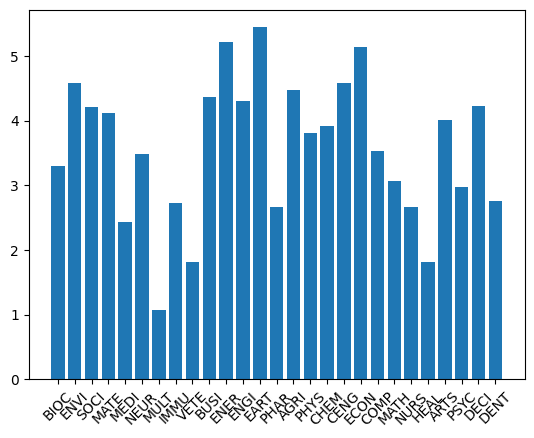

{'BIOC': 3.3,
 'ENVI': 4.58,
 'SOCI': 4.21,
 'MATE': 4.12,
 'MEDI': 2.43,
 'NEUR': 3.48,
 'MULT': 1.08,
 'IMMU': 2.73,
 'VETE': 1.82,
 'BUSI': 4.37,
 'ENER': 5.22,
 'ENGI': 4.31,
 'EART': 5.44,
 'PHAR': 2.67,
 'AGRI': 4.47,
 'PHYS': 3.81,
 'CHEM': 3.91,
 'CENG': 4.58,
 'ECON': 5.14,
 'COMP': 3.53,
 'MATH': 3.06,
 'NURS': 2.67,
 'HEAL': 1.82,
 'ARTS': 4.01,
 'PSYC': 2.97,
 'DECI': 4.22,
 'DENT': 2.75}

In [ ]:
search_for_words(target_words, normalized = True)

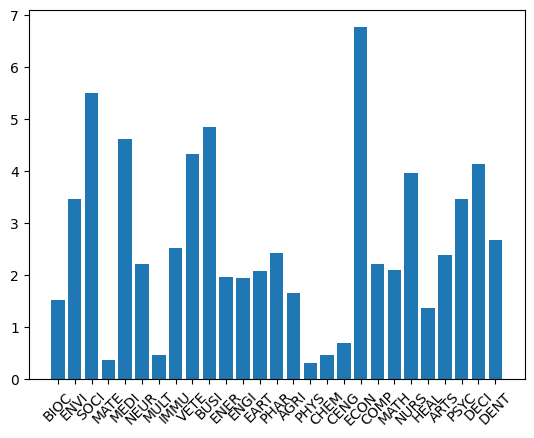

{'BIOC': 1.52,
 'ENVI': 3.47,
 'SOCI': 5.5,
 'MATE': 0.37,
 'MEDI': 4.62,
 'NEUR': 2.21,
 'MULT': 0.47,
 'IMMU': 2.52,
 'VETE': 4.32,
 'BUSI': 4.84,
 'ENER': 1.96,
 'ENGI': 1.94,
 'EART': 2.08,
 'PHAR': 2.43,
 'AGRI': 1.66,
 'PHYS': 0.32,
 'CHEM': 0.46,
 'CENG': 0.7,
 'ECON': 6.76,
 'COMP': 2.21,
 'MATH': 2.11,
 'NURS': 3.97,
 'HEAL': 1.38,
 'ARTS': 2.38,
 'PSYC': 3.46,
 'DECI': 4.13,
 'DENT': 2.67}

In [ ]:
target_words = ["risk", "risks"]

search_for_words(target_words, normalized = True)

In [2]:
econ_psy_dataset = dataset.filter(lambda example: any([label in ["PSYC", "ECON"] for label in example["subjareas"]]))
econ_psy_dataset

  0%|          | 0/41 [00:00<?, ?ba/s]

Dataset({
    features: ['title', 'abstract', 'subjareas', 'keywords', 'asjc', 'body_text', 'author_highlights'],
    num_rows: 2717
})

In [3]:
from datasets import DatasetDict

# Initialize an empty list to store individual chunks
all_chunks = []

# Iterate over each example in the original dataset
for sentences in econ_psy_dataset:
    # Split the body_text into overlapping chunks
    chunks = sentences["body_text"]

    # Add the chunks to the list
    all_chunks.extend(chunks)

# Create a new dataset from the list of chunks
dataset = Dataset.from_dict({"body_text": all_chunks})
dataset

Dataset({
    features: ['body_text'],
    num_rows: 671533
})

In [4]:
small_dataset = dataset.shuffle(seed=23).select(range(400000))
small_dataset

Dataset({
    features: ['body_text'],
    num_rows: 400000
})

In [5]:
small_dataset = small_dataset.train_test_split(test_size=0.2)
small_dataset

DatasetDict({
    train: Dataset({
        features: ['body_text'],
        num_rows: 320000
    })
    test: Dataset({
        features: ['body_text'],
        num_rows: 80000
    })
})

In [6]:
import torch
from transformers import DistilBertTokenizerFast

# Load pre-trained BERT model and tokenizer
model_name = 'distilbert-base-uncased'
tokenizer = DistilBertTokenizerFast.from_pretrained(model_name)

tokenizer_config.json:   0%|          | 0.00/28.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/483 [00:00<?, ?B/s]

In [7]:
tokenizer.add_special_tokens({'pad_token': '[PAD]'})

# Assuming you have a function to tokenize your text
def tokenize_function(examples):
    tokenized_chunk = tokenizer(examples["body_text"],
                                           padding="longest",
                                           truncation=True,
                                           return_special_tokens_mask=True)
    return tokenized_chunk

# Tokenize the dataset
tokenized_dataset = small_dataset.map(tokenize_function, batched=True,
                                       remove_columns=["body_text"])
tokenized_dataset

  0%|          | 0/320 [00:00<?, ?ba/s]

  0%|          | 0/80 [00:00<?, ?ba/s]

DatasetDict({
    train: Dataset({
        features: ['input_ids', 'attention_mask', 'special_tokens_mask'],
        num_rows: 320000
    })
    test: Dataset({
        features: ['input_ids', 'attention_mask', 'special_tokens_mask'],
        num_rows: 80000
    })
})

In [8]:
# Loading the model and moving it to the GPU if available
if torch.cuda.is_available():  # for nvidia GPUs etc.
    device = torch.device('cuda')
elif torch.backends.mps.is_available(): # for Apple Metal Performance Sharder (mps) GPUs
    device = torch.device('mps')
else:
    device = torch.device('cpu')

print(device)

cuda


In [9]:
from transformers import AutoConfig, AutoModelForMaskedLM, TrainingArguments, Trainer, DistilBertConfig, DataCollatorForLanguageModeling


# Configure DistilBERT's initialization
config = DistilBertConfig(dropout=0.2,
                          attention_dropout=0.2,
                          output_hidden_states=True)

model = AutoModelForMaskedLM.from_pretrained('distilbert-base-uncased', config=config)


data_collator = DataCollatorForLanguageModeling(tokenizer=tokenizer, mlm_probability=0.15)



/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

In [10]:
from transformers import TrainingArguments, Trainer

batch_size = 8
# Show the training loss with every epoch
logging_steps = len(tokenized_dataset["train"]) // batch_size

# Define the training arguments
training_args = TrainingArguments(
    output_dir="my_awesome_model",
    overwrite_output_dir=True,
    evaluation_strategy="epoch",
    num_train_epochs=4,
    learning_rate=5e-5,
    weight_decay=0.01,
    per_device_train_batch_size=batch_size,
    per_device_eval_batch_size=batch_size,
    fp16=True,
    logging_steps=logging_steps,
    save_total_limit = 5,
)

In [11]:
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=tokenized_dataset["train"],
    eval_dataset=tokenized_dataset["test"],
    data_collator=data_collator,
    tokenizer=tokenizer,
)

In [12]:
import math

eval_results = trainer.evaluate()
print(f">>> Perplexity: {math.exp(eval_results['eval_loss']):.2f}")

You're using a DistilBertTokenizerFast tokenizer. Please note that with a fast tokenizer, using the `__call__` method is faster than using a method to encode the text followed by a call to the `pad` method to get a padded encoding.


wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize
wandb: Paste an API key from your profile and hit enter, or press ctrl+c to quit:

  ········································


wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc


>>> Perplexity: 20.62


In [13]:
trainer.train()

Epoch,Training Loss,Validation Loss
1,2.703900,2.361833
2,2.479300,2.231543
3,2.332100,2.119050
4,2.225400,2.064415


TrainOutput(global_step=160000, training_loss=2.43518662109375, metrics={'train_runtime': 37222.9546, 'train_samples_per_second': 34.387, 'train_steps_per_second': 4.298, 'total_flos': 1.07901835718957e+17, 'train_loss': 2.43518662109375, 'epoch': 4.0})

In [14]:
eval_results = trainer.evaluate()
print(f">>> Perplexity: {math.exp(eval_results['eval_loss']):.2f}")

>>> Perplexity: 7.87


In [15]:
trainer.save_model("/kaggle/working/model/")

In [17]:
from transformers import modelcard
history = modelcard.parse_log_history(trainer.state.log_history)

train_losses = []
test_losses = []
for key in history[1]:
    train_losses.append(key['Training Loss'])
    test_losses.append(key['Validation Loss'])

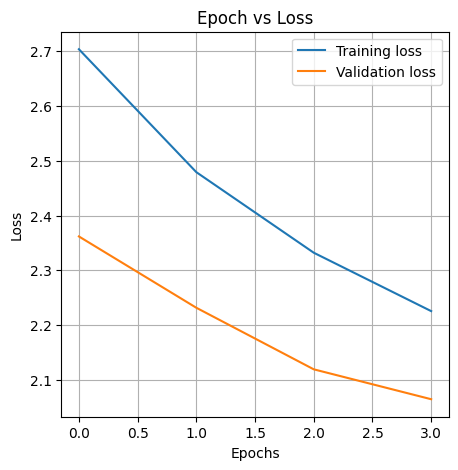

In [18]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(5,5))
ax1 = fig.add_subplot(111)
ax1.plot(range(len(train_losses)),train_losses, label = "Training loss")
ax1.plot(range(len(test_losses)),test_losses,  label = "Validation loss")
ax1.set_xlabel("Epochs")
ax1.set_ylabel("Loss")
ax1.set_title("Epoch vs Loss")
plt.legend()
plt.grid()
plt.show()